In [1]:
import os
os.getcwd()

'/Users/inouenoritake/Documents/Financial_Diary'

In [2]:
import csv
with open('hrishipara_financial_diaries.csv') as var_name:
    reader=csv.reader(var_name)
    A = [row for row in reader]

In [3]:
import numpy as np
import pandas as pn

In [4]:
df = pn.DataFrame(A)

In [5]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df

,date,ref,code,class,description,subclass,tag,takain,takaout,details,notes,flow,type,quartile
1,2015-05-20,descript,02OBM,IRI,rickshaw income,rickshaw driving,bb,260,0,rickshaw,"Rickshaw driving 02obm is 35, rickshaw driver,...",in,income,3
2,2015-05-20,descript,01KIF,IWA,earned income,shop labour,no rec,40,0,vegetable shop,"Wages 01kif , widow, 45. One person hh (she ha...",in,income,4
3,2015-05-20,no rec,01KIF,IWA,earned income,shop labour,no rec,10,0,vegetable shop,no rec,in,income,4
4,2015-05-20,no rec,01KIF,ETE,"snacks, treats, stimulants","betel nut, leaf",no rec,0,-5,betel nut,no rec,out,expenditure,4
5,2015-05-20,no rec,01KIF,ETR,transport costs,ferry,no rec,0,-4,boat,no rec,out,costs,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940294,2021-02-28,no rec,72shm,ISH,shop sales,bakery,no rec,100,0,biscuit,no rec,in,income,1
940295,2021-02-28,no rec,72shm,ISH,shop sales,bakery,no rec,340,0,cake and bread,no rec,in,income,1
940296,2021-02-28,no rec,72shm,ISH,shop sales,processed or cooked food,no rec,100,0,chutney,no rec,in,income,1
940297,2021-02-28,no rec,72shm,ISH,shop sales,tobacco,no rec,570,0,cigarette,no rec,in,income,1


In [8]:
df2 = df.drop(df[(df.code!="02OBM")].index)

In [11]:
df2

,date,ref,code,class,description,subclass,tag,takain,takaout,details,notes,flow,type,quartile
1,2015-05-20,descript,02OBM,IRI,rickshaw income,rickshaw driving,bb,260,0,rickshaw,"Rickshaw driving 02obm is 35, rickshaw driver,...",in,income,3
7,2015-05-20,no rec,02OBM,FSD,savings deposited,MFI ASA,no rec,0,-50,ASA Savings,no rec,out-t,savings out,3
8,2015-05-20,no rec,02OBM,ETR,transport costs,ferry,no rec,0,-16,boat,no rec,out,expenditure,3
9,2015-05-20,no rec,02OBM,BAL,opening balance,ob,no rec,0,-747,ob,no rec,ob,ob,3
10,2015-05-20,no rec,02OBM,EOT,other expenditure,misc living expenses,no rec,0,-15,pocket money to 2 kids,no rec,out-t,expenditure,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169989,2016-10-31,no rec,02OBM,EOT,other expenditure,misc living expenses,no rec,0,-10,daughter,no rec,out-t,expenditure,3
169990,2016-10-31,no rec,02OBM,GTO,gifts to outsiders,"religious, ceremonial",no rec,0,-302,kirton contribution,no rec,out,gifts out,3
169991,2016-10-31,no rec,02OBM,ETE,"snacks, treats, stimulants","betel nut, leaf",no rec,0,-20,pan,no rec,out,expenditure,3
169992,2016-10-31,no rec,02OBM,EFO,food costs,rice,br,0,-500,rice,no rec,out,expenditure,3


In [9]:
import matplotlib.pyplot as plt

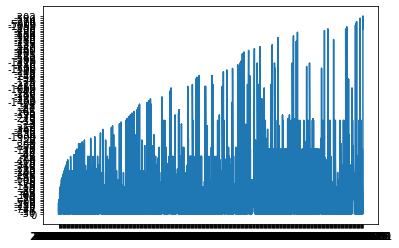

In [10]:
plt.plot(df2.date, df2.takaout)

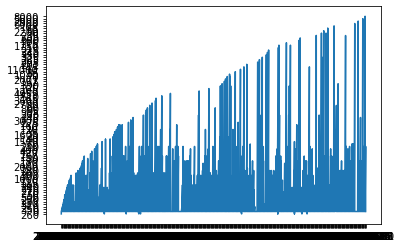

In [12]:
plt.plot(df2.date, df2.takain)

In [16]:
import pandas.statsmodels.formula.api as sm
res = sm.ols(df2.takain, df2,takaout)
res

ModuleNotFoundError: No module named 'pandas.statsmodels'

In [17]:
df['class'].describe

<bound method NDFrame.describe of 1         IRI
2         IWA
3         IWA
4         ETE
5         ETR
         ... 
940294    ISH
940295    ISH
940296    ISH
940297    ISH
940298    ISH
Name: class, Length: 940298, dtype: object>

In [22]:
df['class'].dtypes

dtype('O')

In [26]:
df['class'].unique()

KeyError: ('class', 'description')

In [28]:
df2['description'].unique()

array(['rickshaw income', 'savings deposited', 'transport costs',
       'opening balance', 'other expenditure', 'food costs',
       'loan repayment made', 'snacks, treats, stimulants',
       'toiletries purchased', 'communications', 'fuel costs',
       'earned income', 'loan or howlat taken',
       'Payment from Diary Project', 'home maintenance', 'clothes, cloth',
       'vehicle repair costs', 'rent paid', 'personal grooming',
       'savings withdrawal taken', 'healthcare costs',
       'no transaction today', 'musical income', 'wages paid out',
       'education costs', 'other income', 'gifts to outsiders',
       'work tools and materials', 'utilities cost',
       'gifts from outsiders', 'home construction', 'fees paid',
       'jewellery purchases'], dtype=object)

In [32]:
df3=df2.drop(df[(df.code!=0)].index,errors = 'ignore')
df3

,date,ref,code,class,description,subclass,tag,takain,takaout,details,notes,flow,type,quartile


In [6]:
df.groupby('class').sum()

KeyboardInterrupt: 

In [14]:
df2.groupby('description')['takain'].sum()

description
Payment from Diary Project     6650
clothes, cloth                    0
communications                    0
earned income                 17175
education costs                   0
fees paid                         0
food costs                        0
fuel costs                        0
gifts from outsiders            510
gifts to outsiders                0
healthcare costs                  0
home construction                 0
home maintenance                  0
jewellery purchases               0
loan or howlat taken          12720
loan repayment made               0
musical income                44891
no transaction today              0
opening balance                   0
other expenditure                 0
other income                    340
personal grooming                 0
rent paid                         0
rickshaw income               94442
savings deposited                 0
savings withdrawal taken      22260
snacks, treats, stimulants        0
toiletries purch

In [13]:
df2["takaout"] = pn.to_numeric(df2["takaout"])
df2["takain"] = pn.to_numeric(df2["takain"])

In [17]:
df["takaout"] = pn.to_numeric(df["takaout"])
df["takain"] = pn.to_numeric(df["takain"])

In [19]:
x=df.groupby(['code','description'])['takain'].sum()

code   description               
01KIF  Payment from Diary Project     6550
       clothes, cloth                    0
       earned income                 20221
       fees paid                         0
       food costs                        0
                                     ...  
72shm  toiletries purchased              0
       transport costs                   0
       utilities cost                    0
       wages paid out                    0
       work tools and materials          0
Name: takain, Length: 5027, dtype: int64

In [21]:
df3 = df.drop(df[(df.code!="01KIF")].index)

In [22]:
df3.groupby(['code','description'])['takain'].sum()

code   description               
01KIF  Payment from Diary Project     6550
       clothes, cloth                    0
       earned income                 20221
       fees paid                         0
       food costs                        0
       fuel costs                        0
       gifts from outsiders            285
       gifts to outsiders                0
       healthcare costs                  0
       home maintenance                  0
       jewellery purchases               0
       loan or howlat taken            100
       loan repayment made               0
       no transaction today              0
       opening balance                   0
       other expenditure                 0
       other income                     20
       savings deposited                 0
       savings withdrawal taken        400
       snacks, treats, stimulants        0
       toiletries purchased              0
       transport costs                   0
       utilities cos

In [23]:
df1 = df.drop(df[(df.code!="01KIF")].index)